# Week 4 Exercise: Predicting Fuel Efficiency

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [99]:
# loading dataset
mpg = pd.read_csv("auto-mpg.csv", na_values="?")

In [98]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [106]:
# data prepping
# remove car name column
mpg1 = mpg.drop("car name", axis=1)
# fill ?'s with column mean
mpg1["horsepower"].fillna(mpg1.horsepower.mean(), inplace=True)
# one-hot encoder
one_hot = pd.get_dummies(mpg1.origin, prefix = "origin")
mpg2 = mpg1.join(one_hot)

In [107]:
mpg2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,2,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,1,0,0


In [105]:
# create correlation matrix
corr_matrix = mpg2.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


cylinders, displacement, horsepower, and weight all have significant correlation with mpg

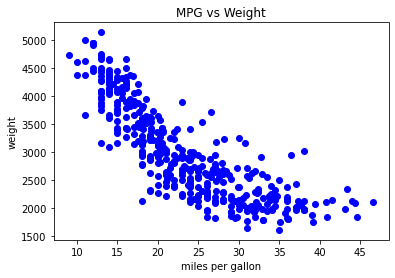

In [72]:
# plotting mpg vs weight
plt.scatter(mpg2.mpg, mpg2.weight, color="blue")
plt.xlabel("miles per gallon"), plt.ylabel("weight")
plt.title("MPG vs Weight")
plt.show()

This graph shows a negative relationship between miles per gallon and weight. As miles per gallon increases, the weight decreases and vice versa. It appears to also be a linear relationship. This matches what our correlation matrix revealed. There, we saw a -.83 correlation coefficient, which suggests a high degree of negative correlation between mpg and weight.

In [111]:
features = mpg2.drop("mpg", axis=1)
target = mpg2["mpg"]

In [138]:
# split data into train and test
feat_train, feat_test, mpg_train, mpg_test = train_test_split(
    features, target, test_size=.2, random_state=1)

In [124]:
weight_train, weight_test, mpg_train, mpg_test = train_test_split(
    mpg2.weight, target, test_size=.2, random_state=1)

In [127]:
# reshape data for model fitting
weight_train = weight_train.values.reshape(-1,1)
weight_test = weight_test.values.reshape(-1,1)
mpg_train = mpg_train.values.reshape(-1, 1)
mpg_test = mpg_test.values.reshape(-1, 1)

In [128]:
# regression
regression = LinearRegression()
model = regression.fit(weight_train, mpg_train)

In [129]:
# find R2, MSE, and MAE on training set
MSE_train = cross_val_score(model, weight_train, mpg_train, scoring="neg_mean_squared_error")
R2_train = cross_val_score(model, weight_train, mpg_train, scoring="r2")
MAE_train= cross_val_score(model, weight_train, mpg_train, scoring="neg_mean_absolute_error")
print("Training Set Evaluations:\n", "-"*75, f"\nMSE: {MSE_train}\nR2: {R2_train}\nMAE: {MAE_train}")

Training Set Evaluations:
 --------------------------------------------------------------------------- 
MSE: [-23.09744329 -22.0259575  -23.19928828 -18.13675906 -16.02032319]
R2: [0.64826628 0.68503272 0.63445853 0.70773924 0.65905601]
MAE: [-3.93782435 -3.70429559 -3.68225674 -3.03312068 -3.03215493]


In [130]:
# find R2, MSE, and MAE on test set
MSE_test = cross_val_score(model, weight_test, mpg_test, scoring="neg_mean_squared_error")
R2_test = cross_val_score(model, weight_test, mpg_test, scoring="r2")
MAE_test = cross_val_score(model, weight_test, mpg_test, scoring="neg_mean_absolute_error")
print("Test Set Evaluations:\n", "-"*75, f"\nMSE: {MSE_test}\nR2: {R2_test}\nMAE: {MAE_test}")

Test Set Evaluations:
 --------------------------------------------------------------------------- 
MSE: [-15.04742459 -10.07960115  -5.72990797  -7.84130611 -24.98889624]
R2: [0.73666968 0.75116872 0.85172425 0.89554364 0.6287767 ]
MAE: [-3.23624541 -2.63081934 -1.92289678 -2.06744492 -3.39134637]


The above evaluations between both the training set and the test set suggest that the model is a good fit for the data. The mean squared error and mean absolute error are both low, showing that the distance between predicted and true values is not far off. In addition, the R squared value is >.6 in all evaluations in both test and training sets which shows that the model explains a large part of the variance in miles per gallon.

One interesting thing to note is that the values for the test set evaluation are consistently higher than the training set. This could be just because the test set is smaller, so the error is naturally going to be smaller, or it could represent and overfitting of the model. 

In [141]:
# multiple regression model
mult_regression = LinearRegression()
mult_model = mult_regression.fit(feat_train, mpg_train)

In [140]:
# find R2, MSE, and MAE on training set
MSE_train2 = cross_val_score(mult_model, feat_train, mpg_train, scoring="neg_mean_squared_error")
R2_train2 = cross_val_score(mult_model, feat_train, mpg_train, scoring="r2")
MAE_train2 = cross_val_score(mult_model, feat_train, mpg_train, scoring="neg_mean_absolute_error")
print("Training Set Evaluations:\n", "-"*75, f"\nMSE: {MSE_train2}\nR2: {R2_train2}\nMAE: {MAE_train2}")

Training Set Evaluations:
 --------------------------------------------------------------------------- 
MSE: [-11.72668297 -14.78274013 -11.96376424 -12.74015466 -10.5666211 ]
R2: [0.8214231  0.78860944 0.81149198 0.79470161 0.77512152]
MAE: [-2.73203621 -3.09468588 -2.45121672 -2.77628524 -2.64582397]


In [142]:
# find R2, MSE, and MAE on test set
MSE_test2 = cross_val_score(model, feat_test, mpg_test, scoring="neg_mean_squared_error")
R2_test2 = cross_val_score(model, feat_test, mpg_test, scoring="r2")
MAE_test2 = cross_val_score(model, feat_test, mpg_test, scoring="neg_mean_absolute_error")
print("Test Set Evaluations:\n", "-"*75, f"\nMSE: {MSE_test2}\nR2: {R2_test2}\nMAE: {MAE_test2}")

Test Set Evaluations:
 --------------------------------------------------------------------------- 
MSE: [-18.67015556  -6.46491143  -1.87913214  -5.45942954 -21.62561441]
R2: [0.6732718  0.84040319 0.95137274 0.92727333 0.67874004]
MAE: [-3.07137078 -2.13166299 -1.1797646  -1.65457743 -3.26940521]


The multiple regression model is better at predicting values in the training set, as is to be expected because it takes more features into account. However, its performance on the test set is much more erratic, which points to the model being overfit on the training set and not working as well on unkown data points such as in the test set